In [1]:
# import correct packages

import pandas as pd
import json
import time
import statistics
import matplotlib
import numpy as np
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
from scipy.stats import ttest_ind
import scipy.stats as stats
from scipy.stats import normaltest
from sklearn.cluster import KMeans
from scipy.cluster.vq import whiten
from sklearn.decomposition import PCA

In [2]:
# read the json file

df = pd.read_json('data.json',lines=True)

In [5]:
# separate data by year and zpid
# the key is the year from [-4:]
data = {2009:{}, 2010:{}, 2011:{}, 2012:{}, 2013:{}, 2014:{}, 2015:{}, 2016:{}}
c = 0
count = 0
for zpid in df['zpid'].tolist():
    homeValue = df.loc[df['zpid'] == zpid]['data'][c]['HomeValueChartData']
    chart = json.loads(homeValue)
    for i in chart['points']:
        year = int(time.ctime(i['x']/1000)[-4:])
        if year in data:
            if zpid in data[year]:
                data[year][zpid] = (i['y'] + data[year][zpid]) * 0.5
                count = count+1
            else:
                data[year][zpid] = (i['y'])
    c = c+1
print(count)

1199120


In [6]:
# add any missing values from a following year
for year in [2010,2011,2012,2013,2014,2015]:
    for zpid in data[year]:
        if zpid not in data[year+1]:
            data[year+1][zpid] = data[year][zpid]
            print("added data point from ", year)

added data point from  2015
added data point from  2015


In [37]:
# initialize difference lists for each year pair
# tot refers to the total range of years that we have grant 
# data for, 2011-2016
diff_data = {"10_11":[], "11_12":[], "12_13":[], "13_14":[], "14_15":[], "15_16":[], "tot":[]}
for zpid in data[2015]:
    diff_data["15_16"].append((data[2016][zpid] - data[2015][zpid]) / data[2015][zpid])
for zpid in data[2014]:
    diff_data["14_15"].append((data[2015][zpid] - data[2014][zpid]) / data[2014][zpid])
for zpid in data[2013]:
    diff_data["13_14"].append((data[2014][zpid] - data[2013][zpid]) / data[2013][zpid])
for zpid in data[2012]:
    diff_data["12_13"].append((data[2013][zpid] - data[2012][zpid]) / data[2012][zpid])
for zpid in data[2011]:
    diff_data["11_12"].append((data[2012][zpid] - data[2011][zpid]) / data[2011][zpid])
for zpid in data[2010]:
    diff_data["10_11"].append((data[2011][zpid] - data[2010][zpid]) / data[2010][zpid])
for zpid in data[2011]:
    diff_data["tot"].append((data[2016][zpid]- data[2011][zpid]) / data[2011][zpid])

In [38]:
for key in diff_data:
    print(len(diff_data[key]))
    print(str(np.mean(diff_data[key])*100) + "%")
    print(str(np.std(diff_data[key])*100) + "%")
    print(' ')

15870
-1.92750120824%
7.72994379027%
 
15870
0.380393977054%
6.38393663319%
 
15870
4.79556550722%
8.43546629985%
 
15870
6.97962084036%
12.4318866857%
 
15870
6.681767177%
12.0545541496%
 
15870
4.81149409595%
11.8075901919%
 
15870
24.1966382215%
18.1589109088%
 


Financial Aid Data (Hand Scraped) Provided by Vonda Garcia director of the UCSD Financial Aid Office, These numbers were provided to us already rounded.

In [39]:
# Numbers entered are in millions of $
y11_y12_Pell = 48.1
y11_y12_UCOP = 81.3
y11_y12_Cal = 94.3
y12_y13_Pell = 44
y12_y13_UCOP = 84.5
y12_y13_Cal = 87.4
y13_y14_Pell = 43.6
y13_y14_UCOP = 87.7
y13_y14_Cal = 90.4
y14_y15_Pell = 44.1
y14_y15_UCOP = 90.3
y14_y15_Cal = 87.8
y15_y16_Pell = 43.2
y15_y16_UCOP = 92.5
y15_y16_Cal = 92.8
y11_y12_Total = y11_y12_Pell + y11_y12_UCOP + y11_y12_Cal
y12_y13_Total = y12_y13_Pell + y12_y13_UCOP + y12_y13_Cal
y13_y14_Total = y13_y14_Pell + y13_y14_UCOP + y13_y14_Cal
y14_y15_Total = y14_y15_Pell + y14_y15_UCOP + y14_y15_Cal
y15_y16_Total = y15_y16_Pell + y15_y16_UCOP + y15_y16_Cal

# Numbers entered represent the number of students granted money from the listed source
y11_y12_Pell_Recepients = 10800
y11_y12_UCOP_Recepients = 13700
y11_y12_Cal_Recepients = 7700
y12_y13_Pell_Recepients = 9900
y12_y13_UCOP_Recepients = 12600
y12_y13_Cal_Recepients = 7200
y13_y14_Pell_Recepients = 9700
y13_y14_UCOP_Recepients = 12300
y13_y14_Cal_Recepients = 7500
y14_y15_Pell_Recepients = 9700
y14_y15_UCOP_Recepients = 12600
y14_y15_Cal_Recepients = 7500
y15_y16_Pell_Recepients = 9500
y15_y16_UCOP_Recepients = 12700
y15_y16_Cal_Recepients = 7700

# Calculating Total Reciepients Without any Overlap (Assuming each student only recieved one Grant)
y11_y12_Total_Recepients_Noverlap = y11_y12_Pell_Recepients + y11_y12_UCOP_Recepients + y11_y12_Cal_Recepients
y12_y13_Total_Recepients_Noverlap = y12_y13_Pell_Recepients + y12_y13_UCOP_Recepients + y12_y13_Cal_Recepients
y13_y14_Total_Recepients_Noverlap = y13_y14_Pell_Recepients + y13_y14_UCOP_Recepients + y13_y14_Cal_Recepients
y14_y15_Total_Recepients_Noverlap = y14_y15_Pell_Recepients + y14_y15_UCOP_Recepients + y14_y15_Cal_Recepients
y15_y16_Total_Recepients_Noverlap = y15_y16_Pell_Recepients + y15_y16_UCOP_Recepients + y15_y16_Cal_Recepients

# Calculating Total Recipients With Maximum Overlap (Assuming each students received as many grant types as possible)
y11_y12_Total_Recepients_Overlap = y11_y12_UCOP_Recepients
y12_y13_Total_Recepients_Overlap = y12_y13_UCOP_Recepients
y13_y14_Total_Recepients_Overlap = y13_y14_UCOP_Recepients
y14_y15_Total_Recepients_Overlap = y14_y15_UCOP_Recepients
y15_y16_Total_Recepients_Overlap = y15_y16_UCOP_Recepients

# Displays the totals
print ("2011-2012 Total Money Given:", y11_y12_Total, "Million Dollars") 
print("2011-2012 Total Recepients:", y11_y12_Total_Recepients_Noverlap, "Students - Assuming no Overlap")
print("2011-2012 Total Recepients:", y11_y12_Total_Recepients_Overlap, "Students - Assuming maximum Overlap\n")
print ("20y12-2013 Total Money Given:", y12_y13_Total, "Million Dollars") 
print("20y12-2013 Total Recepients:", y12_y13_Total_Recepients_Noverlap, "Students - Assuming no Overlap")
print("20y12-2013 Total Recepients:", y12_y13_Total_Recepients_Overlap, "Students - Assuming maximum Overlap\n")
print ("2013-2014 Total Money Given:", y13_y14_Total, "Million Dollars") 
print("2013-2014 Total Recepients:", y13_y14_Total_Recepients_Noverlap, "Students - Assuming no Overlap")
print("2013-2014 Total Recepients:", y13_y14_Total_Recepients_Overlap, "Students - Assuming maximum Overlap\n")
print ("2014-2015 Total Money Given:", y14_y15_Total, "Million Dollars") 
print("2014-2015 Total Recepients:", y14_y15_Total_Recepients_Noverlap, "Students - Assuming no Overlap")
print("2014-2015 Total Recepients:", y14_y15_Total_Recepients_Overlap, "Students - Assuming maximum Overlap\n")
print ("2015-2016 Total Money Given:", y15_y16_Total, "Million Dollars") 
print("2015-2016 Total Recepients:", y15_y16_Total_Recepients_Noverlap, "Students - Assuming no Overlap")
print("2015-2016 Total Recepients:", y15_y16_Total_Recepients_Overlap, "Students - Assuming maximum Overlap\n")



2011-2012 Total Money Given: 223.7 Million Dollars
2011-2012 Total Recepients: 32200 Students - Assuming no Overlap
2011-2012 Total Recepients: 13700 Students - Assuming maximum Overlap

20y12-2013 Total Money Given: 215.9 Million Dollars
20y12-2013 Total Recepients: 29700 Students - Assuming no Overlap
20y12-2013 Total Recepients: 12600 Students - Assuming maximum Overlap

2013-2014 Total Money Given: 221.70000000000002 Million Dollars
2013-2014 Total Recepients: 29500 Students - Assuming no Overlap
2013-2014 Total Recepients: 12300 Students - Assuming maximum Overlap

2014-2015 Total Money Given: 222.2 Million Dollars
2014-2015 Total Recepients: 29800 Students - Assuming no Overlap
2014-2015 Total Recepients: 12600 Students - Assuming maximum Overlap

2015-2016 Total Money Given: 228.5 Million Dollars
2015-2016 Total Recepients: 29900 Students - Assuming no Overlap
2015-2016 Total Recepients: 12700 Students - Assuming maximum Overlap



In [40]:
# Calculating average grant amount per student assuming no overlap
y11_y12_Average_Noverlap = (y11_y12_Total * 1000000) / y11_y12_Total_Recepients_Noverlap
y12_y13_Average_Noverlap = (y12_y13_Total * 1000000) / y12_y13_Total_Recepients_Noverlap
y13_y14_Average_Noverlap = (y13_y14_Total * 1000000) / y13_y14_Total_Recepients_Noverlap
y14_y15_Average_Noverlap = (y14_y15_Total * 1000000) / y14_y15_Total_Recepients_Noverlap
y15_y16_Average_Noverlap = (y15_y16_Total * 1000000) / y15_y16_Total_Recepients_Noverlap
Total_Average_Noverlap = (y11_y12_Average_Noverlap + y12_y13_Average_Noverlap + y13_y14_Average_Noverlap + y14_y15_Average_Noverlap + y15_y16_Average_Noverlap) / 5
Total_Average_Noverlap = round(Total_Average_Noverlap, 2)

# Calculating average Grant amount per student assuming maximum overlap
y11_y12_Average_Overlap = (y11_y12_Total * 1000000) / y11_y12_Total_Recepients_Overlap
y12_y13_Average_Overlap = (y12_y13_Total * 1000000) / y12_y13_Total_Recepients_Overlap
y13_y14_Average_Overlap = (y13_y14_Total * 1000000) / y13_y14_Total_Recepients_Overlap
y14_y15_Average_Overlap = (y14_y15_Total * 1000000) / y14_y15_Total_Recepients_Overlap
y15_y16_Average_Overlap = (y15_y16_Total * 1000000) / y15_y16_Total_Recepients_Overlap
Total_Average_Overlap = (y11_y12_Average_Overlap + y12_y13_Average_Overlap + y13_y14_Average_Overlap + y14_y15_Average_Overlap + y15_y16_Average_Overlap) / 5
Total_Average_Overlap = round(Total_Average_Overlap, 2)

# Calculateing the average of the full overlap and no overlap
y11_y12_Average  = (y11_y12_Average_Noverlap + y11_y12_Average_Overlap) / 2 
y12_y13_Average = (y12_y13_Average_Noverlap + y12_y13_Average_Overlap) / 2
y13_y14_Average = (y13_y14_Average_Noverlap + y13_y14_Average_Overlap) / 2
y14_y15_Average = (y14_y15_Average_Noverlap + y14_y15_Average_Overlap) / 2
y15_y16_Average = (y15_y16_Average_Noverlap + y15_y16_Average_Overlap) / 2
Total_Average = (Total_Average_Noverlap + Total_Average_Overlap) / 2
Total_Average = round(Total_Average, 2)

# Printing final results
print("Average amount of money given to a student reciving aid assuming no overlap: $", Total_Average_Noverlap)
print("Average amount of money given to a student reciving aid assuming maximum overlap: $", Total_Average_Overlap)
print("Average amount of money given to a student reciving aid averaged: $", Total_Average)


Average amount of money given to a student reciving aid assuming no overlap: $ 7366.07
Average amount of money given to a student reciving aid assuming maximum overlap: $ 17422.96
Average amount of money given to a student reciving aid averaged: $ 12394.51


In [75]:
# Calculating the percent increase of financial aid given from year to year (no overlap)
y11y12_y12y13_PIncrease_No = ((y12_y13_Average_Noverlap - y11_y12_Average_Noverlap) / y11_y12_Average_Noverlap) 
y12y13_y13y14_PIncrease_No = ((y13_y14_Average_Noverlap - y12_y13_Average_Noverlap) / y12_y13_Average_Noverlap)
y13y14_y14y15_PIncrease_No = ((y14_y15_Average_Noverlap - y13_y14_Average_Noverlap) / y13_y14_Average_Noverlap)
y14y15_y15y16_PIncrease_No = ((y15_y16_Average_Noverlap - y14_y15_Average_Noverlap) / y14_y15_Average_Noverlap)
#total
ytot_PIncrease_No = ((y15_y16_Average_Noverlap - y11_y12_Average_Noverlap) / y11_y12_Average_Noverlap)

# Calculating the percent increase of financial aid given from year to year (max overlap)
y11y12_y12y13_PIncrease_O = ((y12_y13_Average_Overlap - y11_y12_Average_Overlap) / y11_y12_Average_Overlap)
y12y13_y13y14_PIncrease_O = ((y13_y14_Average_Overlap - y12_y13_Average_Overlap) / y12_y13_Average_Overlap)
y13y14_y14y15_PIncrease_O = ((y14_y15_Average_Overlap - y13_y14_Average_Overlap) / y13_y14_Average_Overlap)
y14y15_y15y16_PIncrease_O = ((y15_y16_Average_Overlap - y14_y15_Average_Overlap) / y14_y15_Average_Overlap)
#total
ytot_PIncrease_O = ((y15_y16_Average_Noverlap - y11_y12_Average_Noverlap) / y11_y12_Average_Noverlap)


# Calculating the percent increase of financial aid givin from year to year (averaged)
y11y12_y12y13_PIncrease = ((y12_y13_Average - y11_y12_Average) / y11_y12_Average)
y12y13_y13y14_PIncrease = ((y13_y14_Average - y12_y13_Average) / y12_y13_Average)
y13y14_y14y15_PIncrease = ((y14_y15_Average - y13_y14_Average) / y13_y14_Average)
y14y15_y15y16_PIncrease = ((y15_y16_Average - y14_y15_Average) / y14_y15_Average)
#total
ytot_PIncrease = ((y15_y16_Average_Noverlap - y11_y12_Average_Noverlap) / y11_y12_Average_Noverlap)


In [42]:
# Running a normality test on Home Data
st_y11y12, p_y11y12 = normaltest(diff_data["11_12"])
st_y12y13, p_y12y13 = normaltest(diff_data["12_13"])
st_y13y14, p_y13y14 = normaltest(diff_data["13_14"])
st_y14y15, p_y14y15 = normaltest(diff_data["14_15"])
st_y15y16, p_y15y16 = normaltest(diff_data["15_16"])
st_tot, p_tot = normaltest(diff_data["tot"])
print(p_y11y12)
print(p_y12y13)
print(p_y13y14)
print(p_y14y15)
print(p_y15y16)
print(p_tot)

0.0
0.0
0.0
0.0
0.0
0.0


A value of 0.0 indicates that these distributions are very not normal, and thus we cannot use z-test analysis.
We plot histograms to investigate how to extract a normal representation of this data.

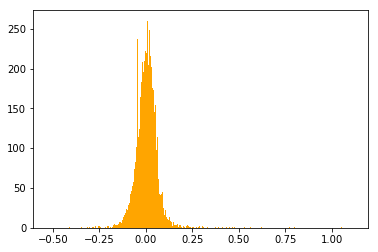

In [43]:
# Plotting histograms of the distrobution of the percent change in the price of houses from 2011 - 2012
plt.hist(diff_data["11_12"], 1000, facecolor = 'orange') 
f2 = plt.gcf()

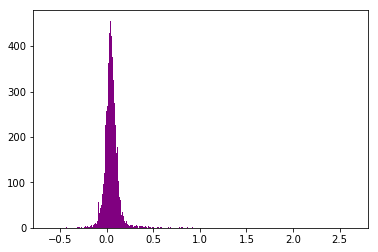

In [44]:
# Plotting histograms of the distrobution of the percent change in the price of houses from 2012 - 2013
plt.hist(diff_data["12_13"], 1000, facecolor = 'purple') 
f2 = plt.gcf()

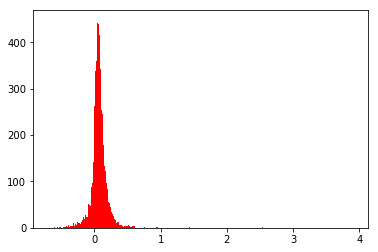

In [45]:
# Plotting histograms of the distrobution of the percent change in the price of houses from 2013 - 2014
plt.hist(diff_data["13_14"], 1000, facecolor = 'red') 
f2 = plt.gcf()

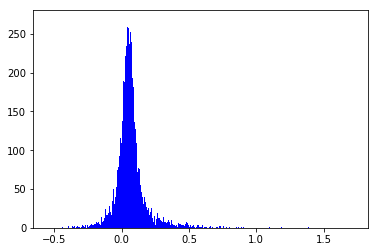

In [46]:
# Plotting histograms of the distrobution of the percent change in the price of houses from 2014 - 2015
plt.hist(diff_data["14_15"], 1000, facecolor = 'blue') 
f2 = plt.gcf()

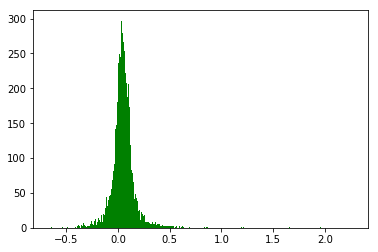

In [47]:
# Plotting histograms of the distrobution of the percent change in the price of houses from 2015 - 2016
plt.hist(diff_data["15_16"], 1000, facecolor = 'green') 
f2 = plt.gcf()

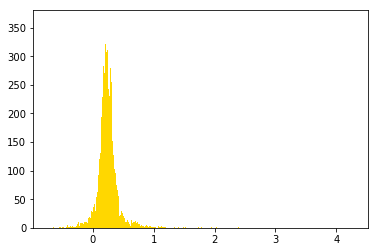

In [64]:
# Plotting histograms of the distrobution of the percent change in the price of houses from 2011 - 2016
plt.hist(diff_data["tot"], 1000, facecolor = 'gold') 
f2 = plt.gcf()

Obviously the plots above are far from normal because of there are huge outliers. Otherwise, the distributions look somewhat normal and are at least unimodal. Using statistical methods, we will remove outliers from the data to see if this yields a normal distribution.
We can ignore these outliers for two reasons. First of all, the average student budget would not be able to keep up with a significant increase in housing cost as seen above (up to 400%), thus students cannot be the target market of that housing unit and it is not relevant to our analysis. Second, Zillow uses data scraping methods to pull list prices from web pages that are not always correct, and does not fix those values. This would account for some of the more extreme price increases (up to 400% increase), and thus is not useful data. 

In [52]:
# Calculating what dictates an outlier for each set of years

pos_outliers = {"10_11":0, "11_12":0, "12_13":0, "13_14":0, "14_15":0, "15_16":0, "tot":0}
neg_outliers = {"10_11":0, "11_12":0, "12_13":0, "13_14":0, "14_15":0, "15_16":0, "tot":0}
for year in ["10_11", "11_12", "12_13", "13_14", "14_15", "15_16", "tot"]:
    print(year)
    pos_out = (stats.iqr(diff_data[year]) * 1.5) + (np.median(diff_data[year]) + ((stats.iqr(diff_data[year])) * .5))
    neg_out = ((np.median(diff_data[year]) - (stats.iqr(diff_data[year]) * .5)) - (stats.iqr(diff_data[year]) * 1.5))
    
    pos_outliers[year] = pos_out
    neg_outliers[year] = neg_out

10_11
11_12
12_13
13_14
14_15
15_16
tot


In [77]:
# this is just to switch between an integer value of year and the corresponding year range key
key_swp = {2011:"10_11",2012:"11_12",2013:"12_13",2014:"13_14",2015:"14_15",2016:"15_16"}
key_swp_rvrs = {"10_11":2011,"11_12":2012,"12_13":2013,"13_14":2014,"14_15":2015,"15_16":2016}

#the below outlier zpids are for the previous year to the year of entry: 2011 = 10-11
outlier_zpids = {2011:[],2012:[],2013:[],2014:[],2015:[],2016:[],"tot":[]}
for year in [2011,2012,2013,2014,2015,2016]:
    for zpid in data[year]:
        if zpid in data[year-1]:
            if (data[year][zpid] - data[year-1][zpid])/ data[year-1][zpid] >= pos_outliers[key_swp[year]]:
                outlier_zpids[year].append(zpid)
            elif (data[year][zpid] - data[year-1][zpid])/ data[year-1][zpid] <= neg_outliers[key_swp[year]]:
                outlier_zpids[year].append(zpid)
print(len(outlier_zpids[2011]))

for zpid in data[2011]:
    if ((data[2016][zpid] - data[2011][zpid]) / data[2011][zpid] >= pos_outliers["tot"]) or ((data[2016][zpid] - data[2011][zpid]) / data[2011][zpid] <= neg_outliers["tot"]):
        outlier_zpids["tot"].append(zpid)
print(len(outlier_zpids["tot"]))


761
1318


This method of finding outliers classifies approximately 4.8% of our data as outliers, and 8.3% for the difference across the entire 2011-2016 range.

In [56]:
# initialize difference lists
diff_data_out = {"10_11":[], "11_12":[], "12_13":[], "13_14":[], "14_15":[], "15_16":[]}

diff_data_full_out = []

#get difference data with outliers removed
for zpid in data[2015]:
    if zpid not in outlier_zpids[2016]:
        diff_data_out["15_16"].append((data[2016][zpid] - data[2015][zpid]) / data[2015][zpid])
for zpid in data[2014]:
    if zpid not in outlier_zpids[2015]:
        diff_data_out["14_15"].append((data[2015][zpid] - data[2014][zpid]) / data[2014][zpid])
for zpid in data[2013]:
    if zpid not in outlier_zpids[2014]:
        diff_data_out["13_14"].append((data[2014][zpid] - data[2013][zpid]) / data[2013][zpid])
for zpid in data[2012]:
    if zpid not in outlier_zpids[2013]:
        diff_data_out["12_13"].append((data[2013][zpid] - data[2012][zpid]) / data[2012][zpid])
for zpid in data[2011]:
    if zpid not in outlier_zpids[2012]:
        diff_data_out["11_12"].append((data[2012][zpid] - data[2011][zpid]) / data[2011][zpid])
for zpid in data[2010]:
    if zpid not in outlier_zpids[2011]:
        diff_data_out["10_11"].append((data[2011][zpid] - data[2010][zpid]) / data[2010][zpid])
        
for zpid in data[2010]:
    if zpid not in outlier_zpids["tot"]:
        diff_data_full_out.append((data[2016][zpid] - data[2011][zpid]) / data[2011][zpid])


After removing the outliers, we check to see if the distribution is more normal.

In [65]:
# Running a normality test on Home Data after removing the outliers
st_y11y12, p_y11y12 = normaltest(diff_data_out["11_12"])
st_y12y13, p_y12y13 = normaltest(diff_data_out["12_13"])
st_y13y14, p_y13y14 = normaltest(diff_data_out["13_14"])
st_y14y15, p_y14y15 = normaltest(diff_data_out["14_15"])
st_y15y16, p_y15y16 = normaltest(diff_data_out["15_16"])
st_ytot, p_ytot = normaltest(diff_data_full_out)
print(p_y11y12)
print(p_y12y13)
print(p_y13y14)
print(p_y14y15)
print(p_y15y16)
print(p_ytot)

2.22068222886e-09
0.30985407754
8.58999612547e-11
5.71673604085e-08
0.00042838784471
0.00135820957158


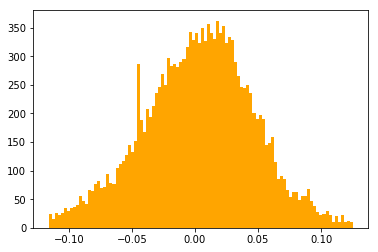

In [30]:
# Plotting histograms of the distrobution of the percent change in the price of houses from 2011 - 2012 with outliers
plt.hist(diff_data_out["11_12"], 100, facecolor = 'orange') 
f2 = plt.gcf()

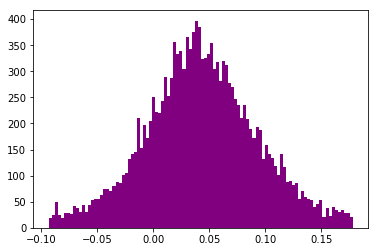

In [31]:
# Plotting histograms of the distrobution of the percent change in the price of houses from 2012 - 2013 with outliers removed
plt.hist(diff_data_out["12_13"], 100, facecolor = 'purple') 
f2 = plt.gcf()

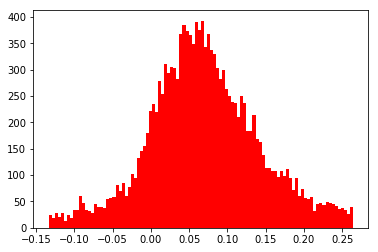

In [32]:
# Plotting histograms of the distrobution of the percent change in the price of houses from 2013 - 2014 with outliers removed
plt.hist(diff_data_out["13_14"], 100, facecolor = 'red') 
f2 = plt.gcf()

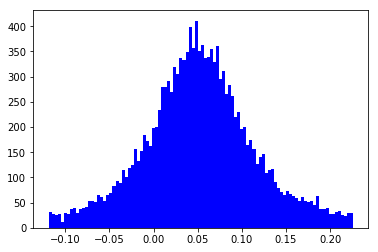

In [33]:
# Plotting histograms of the distrobution of the percent change in the price of houses from 2014 - 2015 with outliers removed
plt.hist(diff_data_out["14_15"], 100, facecolor = 'blue') 
f2 = plt.gcf()

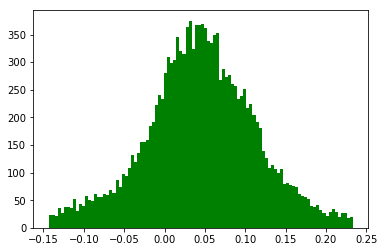

In [63]:
# Plotting histograms of the distrobution of the percent change in the price of houses from 2015 - 2016 with outliers removed
plt.hist(diff_data_out["15_16"], 100, facecolor = 'green') 
f2 = plt.gcf()

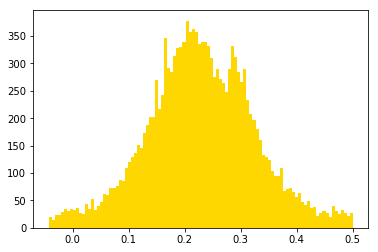

In [62]:
# Plotting histograms of the distrobution of the percent change in the price of houses from 2011 - 2016 with outliers removed
plt.hist(diff_data_full_out, 100, facecolor = 'gold') 
f2 = plt.gcf()

Though the normaltest p_values still indicate that these distributions are mostly not normal, the values returned are decimals instead of 0.0 so we are getting closer. In the case of 2012-2013, the distribution is normal. 
We can at least proceed with analysis on the 2012-2013 year range. For the remaining years, we will do analysis as if they are normal, keeping in mind that any results are unreliable. 
In the future, more data would likely yield a more normal distribution, since what we are seeing is rough but close to normal. 

In [78]:
# calculate the average and std dev for the distributions with no outliers
mu = {2011:0,2012:0,2013:0,2014:0}
stdDev = {2011:0,2012:0,2013:0,2014:0}
mu_tot = 0
stdDev_tot = 0


for key in diff_data_out:
    print(key)
    print(len(diff_data_out[key]))
    mu[key_swp_rvrs[key]] = np.mean(diff_data_out[key])
    print(str(np.mean(diff_data_out[key])*100) + "%")
    stdDev[key_swp_rvrs[key]] = np.std(diff_data_out[key])
    print(str(np.std(diff_data_out[key])*100) + "%")
    print(' ')
    
print("tot")
print(len(diff_data_full_out))
mu_tot = np.mean(diff_data_full_out)
print(str(np.mean(diff_data_full_out)*100) + "%")
stdDev_tot = np.std(diff_data_full_out)
print(str(np.std(diff_data_full_out)*100) + "%")

10_11
15109
-1.36905082643%
5.5019769938%
 
11_12
15296
0.278126399354%
4.3458393305%
 
12_13
15099
4.29233542456%
5.01695293852%
 
13_14
14604
6.93286761259%
7.2255698971%
 
14_15
14357
5.18170572355%
6.26846628267%
 
15_16
14632
4.46716151491%
6.82647657191%
 
tot
14552
22.8895371778%
9.64622060438%


The std dev values for the distributions with outliers removed are slightly lower than before.
Now, we will get z-scores for the percent increase in grant money based on the percent increase in housing costs to see if grants are increasing in proportion to housing costs. 
Z = X-mu/stdDev

In [84]:
# z-score for grant increase values, max overlap
z_score_max = {2011:0,2012:0,2013:0,2014:0}

#creates a dictionary for X values, for simple iteration
x_tot_max = ytot_PIncrease_O
x_max = {2011:y11y12_y12y13_PIncrease_O, 2012:y12y13_y13y14_PIncrease_O,2013:y13y14_y14y15_PIncrease_O,
         2014:y14y15_y15y16_PIncrease_O}

for year in z_score_max:
    z_score_max[year] = (x_max[year] - mu[year]) / stdDev[year]

z_tot_max = (x_tot_max - mu_tot) / stdDev_tot
for year in z_score_max:
    print( z_score_max[year])
print(z_tot_max)


1.14649562969
1.13047197001
-1.28626432237
-0.679158986222
-1.33590583319


We reject the null hypothesis at a z score of +- 1.645. Thus, for these values, we fail to reject the null hypothesis for any year range, and conclude that we have insufficient evidence that grant aid is not increasing at the same rate as rent prices. 

In [86]:
# z-score for grant increase values, no overlap
z_score_none = {2011:0,2012:0,2013:0,2014:0}

#creates a dictionary for X values, for simple iteration
x_tot_none = ytot_PIncrease_No
x_none = {2011:y11y12_y12y13_PIncrease_No, 2012:y12y13_y13y14_PIncrease_No,2013:y13y14_y14y15_PIncrease_No,
         2014:y14y15_y15y16_PIncrease_No}

for year in z_score_none:
    z_score_none[year] = (x_none[year] - mu[year]) / stdDev[year]

z_tot_none = (x_tot_none - mu_tot) / stdDev_tot
for year in z_score_none:
    print( z_score_none[year])
print(z_tot_none)

1.09165192857
0.714357215216
-1.01172710545
-0.614694046508
-1.33590583319


In [90]:
# z-score for grant increase values, averaged
z_score_avg = {2011:0,2012:0,2013:0,2014:0}
z_tot_avg = 0


#creates a dictionary for X values, for simple iteration
x_tot_avg = ytot_PIncrease
x_avg = {2011:y11y12_y12y13_PIncrease, 2012:y12y13_y13y14_PIncrease,2013:y13y14_y14y15_PIncrease,
         2014:y14y15_y15y16_PIncrease}

for year in z_score_avg:
    z_score_avg[year] = (x_avg[year] - mu[year]) / stdDev[year]

z_tot_avg = (x_tot_avg - mu_tot) / stdDev_tot
for year in z_score_avg:
    print( z_score_avg[year])
print(z_tot_avg)

1.13012615899
1.00652289412
-1.20547944753
-0.660001952251
-1.33590583319
